# matplotlib Practice 3D

### Imports

In [16]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from matplotlib import cm
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

%matplotlib inline

### Line Plots

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes.Axes3DSubplot'>


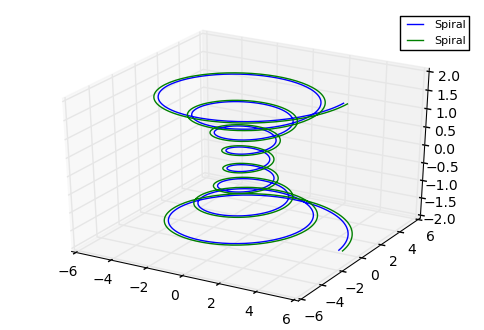

In [17]:
mpl.rcParams['legend.fontsize'] = 8

fig = plt.figure()
ax = fig.gca(projection='3d')

print(type(fig))
print(type(ax))

pts = 1000
theta = np.linspace(-8 * np.pi, 8 * np.pi, pts)
z = np.linspace(-2, 2, pts)
ax.plot(np.cos(theta) * (z**2 + 1), np.sin(theta) * (z**2 + 1), 
        z, label = 'Spiral')
ax.plot(np.cos(theta) * (z**2 + 1.2), np.sin(theta) * (z**2 + 1.2), 
        z, label = 'Spiral')
ax.legend()
plt.show()

### Scatter Plots

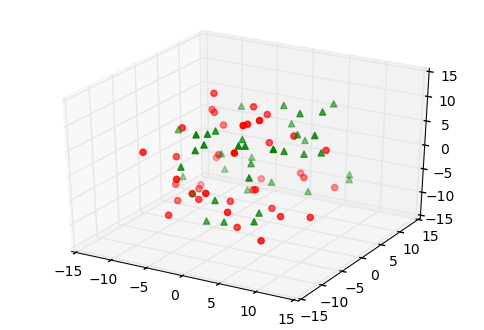

In [18]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = '3d')

numOfpts = 40
maxVal = 10
minVal = -10

x = np.random.random(numOfpts) * (maxVal - minVal) + minVal
y = np.random.random(numOfpts) * (maxVal - minVal) + minVal
z = np.random.random(numOfpts) * (maxVal - minVal) + minVal

ax.scatter3D(x, y, z, color = 'r', marker = 'o', label = 'Random Points')

x = np.random.random(numOfpts) * (maxVal - minVal) + minVal
y = np.random.random(numOfpts) * (maxVal - minVal) + minVal
z = np.random.random(numOfpts) * (maxVal - minVal) + minVal

ax.scatter3D(x, y, z, color = 'g', marker = '^', label = 'Random Points')

ax.legend()
fig.show()

### Wireframe Plots

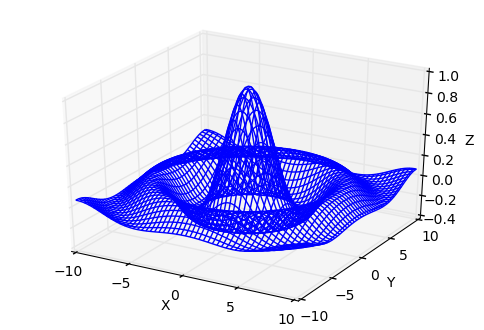

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)/R

ax.plot_wireframe(X, Y, Z, rstride = 2, cstride = 2)

plt.show()

### Surface Plots

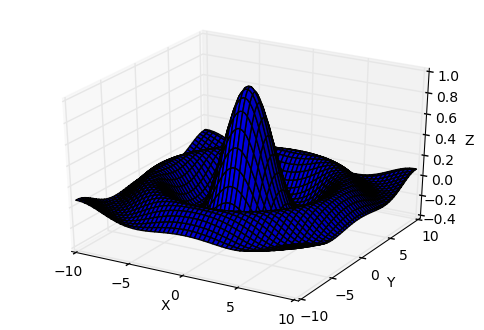

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)/R

ax.plot_surface(X, Y, Z, rstride = 2, cstride = 2)

plt.show()

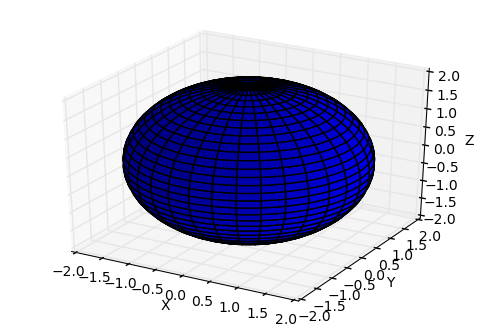

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
THETA, PHI = np.meshgrid(theta, phi)
X = 2 * np.cos(THETA) * np.sin(PHI) 
Y = 2 * np.sin(THETA) * np.sin(PHI)
Z = 2 * np.cos(PHI)

ax.plot_surface(X, Y, Z, rstride = 3, cstride = 3)

plt.show()

### Tri-surface Plots

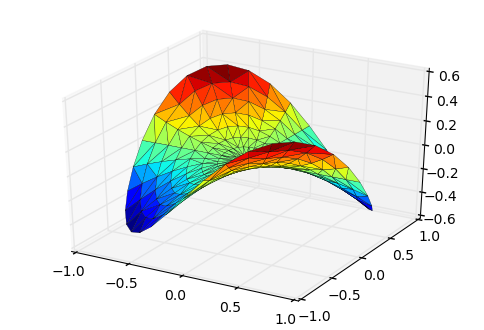

In [22]:
n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
      
# Repeat all angles for each radius
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()

### Contour Plots

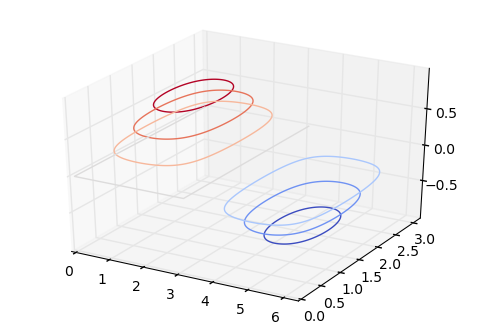

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 2*np.pi, 1000)
y = np.linspace(0, np.pi, 1000)
X, Y = np.meshgrid(x, y) 
Z = np.sin(X) * np.sin(Y)
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize = 9, inline = 1)

plt.show()

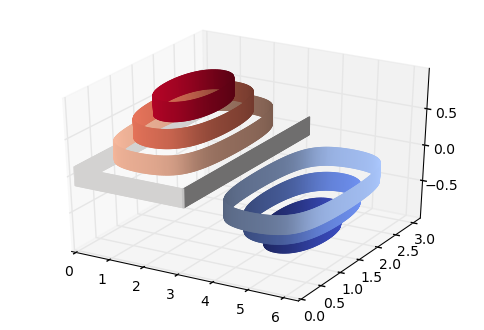

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 2*np.pi, 1000)
y = np.linspace(0, np.pi, 1000)
X, Y = np.meshgrid(x, y) 
Z = np.sin(X) * np.sin(Y)
cset = ax.contour(X, Y, Z, extend3d = True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize = 9, inline = 1)

plt.show()

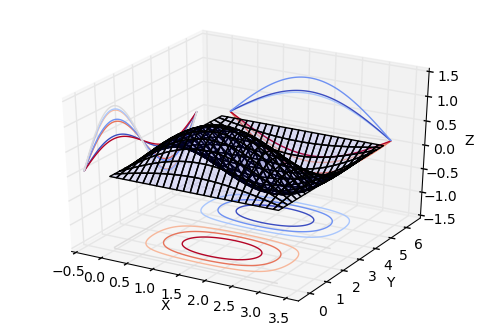

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y) 
Z = np.sin(X) * np.sin(Y)
cset = ax.plot_surface(X, Y, Z, rstride = 4, 
                       cstride = 4, alpha = 0.1)

cset = ax.contour(X, Y, Z, zdir = 'z', offset = -1.5, cmap = cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'x', offset = -0.5, cmap = cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir = 'y', offset = 2*np.pi + 0.5, cmap = cm.coolwarm)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-0.5, np.pi + 0.5)
ax.set_ylim(-0.5, 2*np.pi + 0.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

### Filled Contour Plots

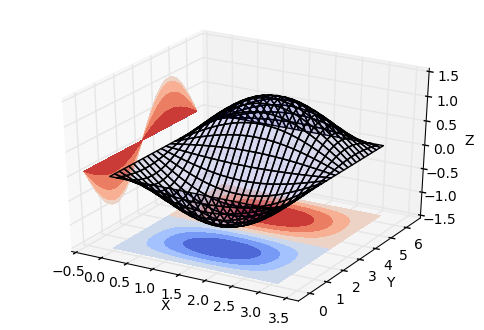

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y) 
Z = -1 * np.sin(X) * np.sin(Y)

ax.plot_surface(X, Y, Z, rstride = 4, 
                cstride = 4, alpha = 0.1, zorder = 0.6)

cset = ax.contourf(X, Y, Z, zdir = 'z', offset = -1.5, cmap = cm.coolwarm, zorder = 0.5)
cset = ax.contourf(X, Y, Z, zdir = 'x', offset = -0.5, cmap = cm.coolwarm, zorder = 0.5)
# cset = ax.contourf(X, Y, Z, zdir = 'y', offset = np.pi + 0.5, cmap = cm.coolwarm, zorder = 0.5)
# bug in matplotlib

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-0.5, np.pi + 0.5)
ax.set_ylim(-0.5, 2 * np.pi + 0.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

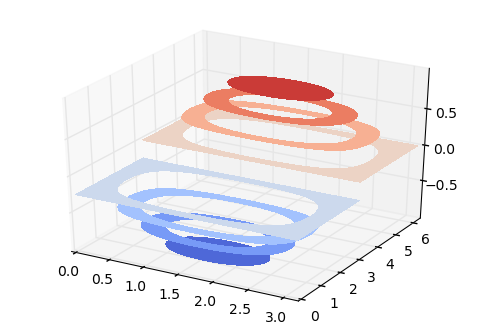

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')

cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)

ax.clabel(cset, fontsize=9, inline=1)

plt.show()

### Polygon Plots

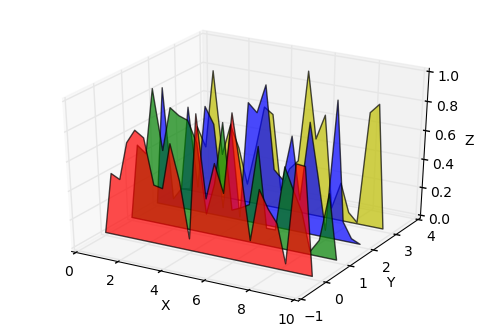

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.3)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

### Bar Plots

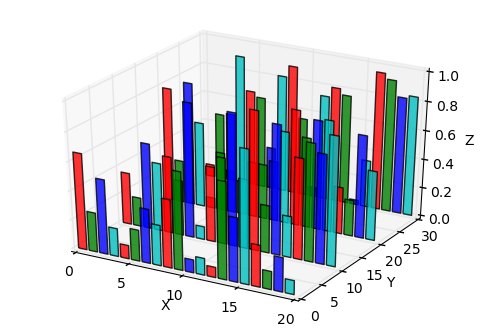

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = ['r', 'g', 'b', 'c'] * 5
    ax.bar(xs, ys, zs=z, zdir ='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Quiver

ValueError: too many values to unpack

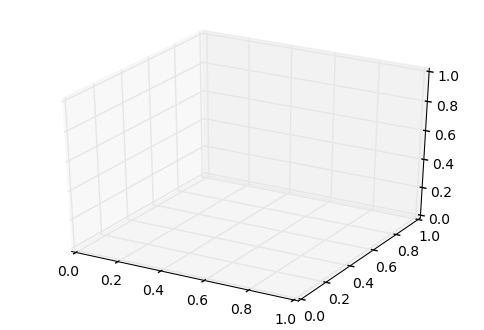

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z)

ax.quiver(x, y, z, u, v, w, length = 0.1)

plt.show()

# NO IDEA ON WHAT THE PROBLEM IS. GOOGLE SEARCH DIDN'T HELP MUCH.

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, 0, zdir='z', label='zs=0, zdir=z')

colors = ('r', 'g', 'b', 'k')
for c in colors:
    x = np.random.sample(20)
    y = np.random.sample(20)
    ax.scatter(x, y, 0, zdir='y', c=c)

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

plt.show()

# Examples

Consider the function:

$$F(\textbf{x}) = F(x_1, x_2) = x_1^2 + 2 x_2^2$$

Its directional derivative at point $(0.5, 0.5)$ along $(2, -1)$ is $0$. So $(2, -1)$ is a perpendicular to the surface at $(0.5, 0.5)$. Below, the graph is plotted to check.

In [ ]:
# Assume x_1 = x and x_2 = y

fig = plt.figure()
ax = fig.gca(projection = '3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + 2 * Y**2

cset = ax.plot_surface(X, Y, Z, rstride = 8, cstride = 8, alpha = 0.9, cmap = cm.coolwarm)

xo = 0.5
yo = 0.5

u = 2
v = -1

parameter = np.linspace(-0.5, 0, 10)
cset = ax.plot(u*parameter + xo, v*parameter + yo, 0)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()